# Logistic Regression

## From Scratch

Alright I got Simple Linear Regression coded and Multivariate Linear Regression coded. So, naturally I feel the next model to code from scratch is Logistic Regression. Now, if you are unfamiliar with linear regression I sugguest going back to one of my notebooks on linear regression or another source to understand the mathematical concepts and code to bring linear regression to life.

# Table of Contents
<br>
### 1. Logistic Regression VS Linear Regression
### 2. Data
### 3. The Math
### 4. Coding the Model
### 5. Evaluation
### 6. Compare to Scikit-learn

# 1. Logistic VS Linear
In my notebook on Simple Linear Regression From Scratch talks about the difference's between a classification problem and a regression problem. However, it feels appropriate to go over the difference here as well.
<br> 
I like to use basketball as an analogy to distingish the two types. In  Basketball you have to outcomes you can try to predict. You can predict a win/loss or you can predict the final score. If you want to predict a win/loss then you have a classification task on your hands and if you want to predict the score you have a continious task on your hands. 
<br>
Logistic Regression is generally used for classification tasks and Linear Regression is generally used for continous tasks. 
<br>
The difference in how these models function is that Linear Regression the output is the weighted sum of the inputs. Logistic Regression on the other hand is a generalized version of Linear Regression. The weighted sum does not get output directly, but first gets passed through a function (known as an activation function) that maps the value between 0 and 1. The image I got from google images visualizes the difference.

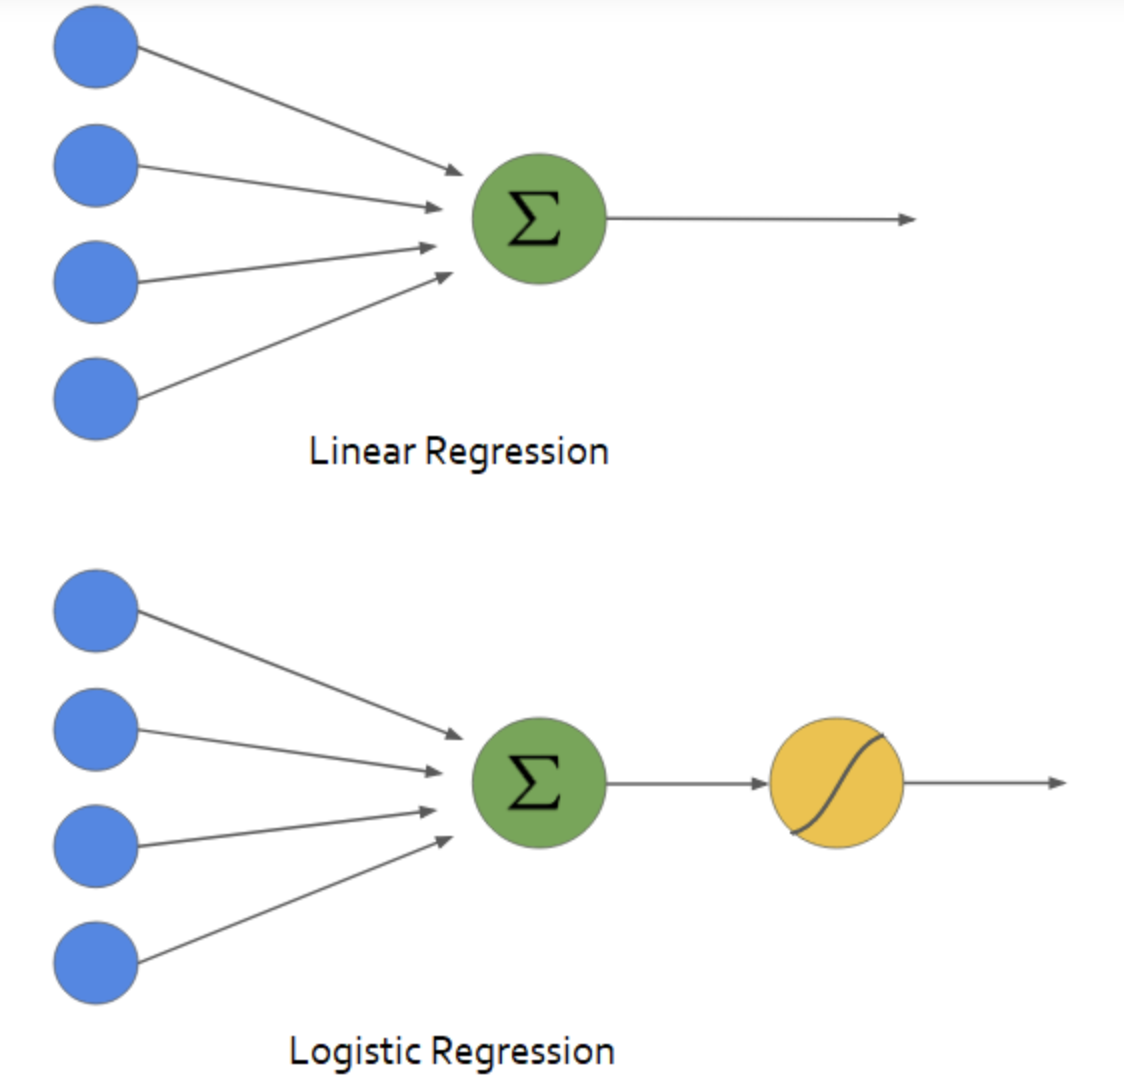

In [1]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Screen Shot 2019-09-11 at 8.56.22 PM.png')

# 2. The Data
I will use toy data from scikit-learn to run through my model by hand. I will load in the iris dataset. I am picking this data set because it is easy data set to obtain and an even easier dataset to classify. The task isn't to build the greatest logistic regression model, but a functioning and comparable model so the iris data set should work for this purpose.

In [2]:
# libraries and packages
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
import pprint
from __future__ import division

#load in the data
data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target [:100]
x_full = data.data[:100, :]

# 3. The Math
The math is going to look a little different from the linear regression math, but do not let it intimidate you, the concepts are going to be similar.
<br>
1. Logistic Function 
   (we will pass the linear function through the sigmoid function get a logistic function)
<br>
2. Cost Function
<br>
3. Gradient Descent (minimize costs)

## Logistic Function
if we can recall our linear function in matrix form looked like: 
<br>
$y={\beta^T}X$
<br>
now we need to take the log of this function (pass it through the sigmoid or activation function) to make it transform it from linear to logit and we get:
<br>
g(y) = $\frac{1}{1+e^{-y}}$

# Cost Function

As we have figured out. Functions have weights and parameters and we want to find the best values for them. To start we just pick a random value and move through the the weights by minimizing the cost. The cost function will be defined by the image below.

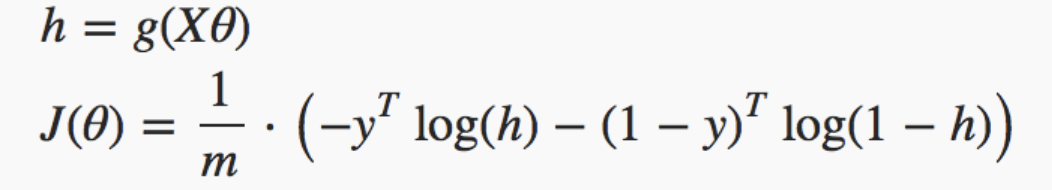

In [3]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Screen Shot 2019-09-11 at 10.04.45 PM.png')

# Gradient Descent
As mentioned above this function will be used to minimize the cost. The weights will get updated by subtracting the learning rate by the gradient. this step will need to be repeat until we reach the optimal solution. Gradient Descent will be define in the image below

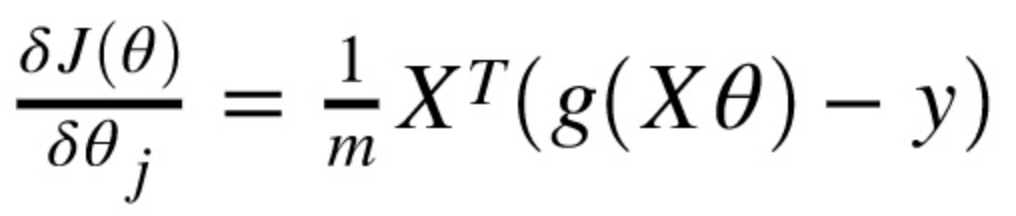

In [4]:
from IPython.display import Image
Image('/Users/connerleavitt/Desktop/Screen Shot 2019-09-11 at 10.08.38 PM.png')

# 4. Coding the Model

I am going to create a class to write the model. so follow the commented code to follow my logic

In [5]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [6]:
model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)

# 5. Evaluation

In [7]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [8]:
model.theta

array([-30.54815919,  13.64286719, -13.84406026])

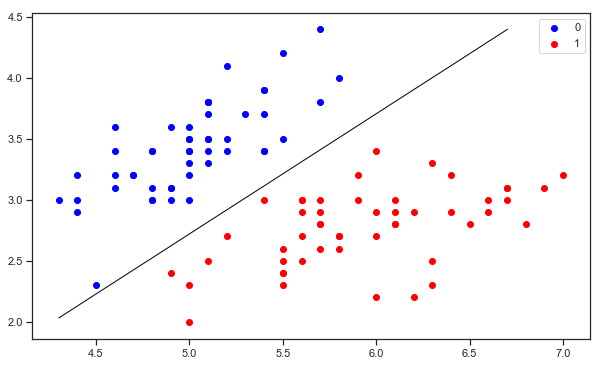

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

# Compare with Scikit-Learn

In [14]:
#scikit-learn model
scikitmodel = LogisticRegression()

In [15]:
scikitmodel.fit(X, y)

In [16]:
preds = model.predict(X)
(preds == y).mean()

0.99